# Projectile Motion Assignment: Due 9/24

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{{v_x}^2 + {v_y}^2}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{{v_x}^2 + {v_y}^2} \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib notebook

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)) 

$\frac{dx}{dt} = v_x$

$\frac{dy}{dt} = v_y$

$\frac{dv_x}{dt} = 0$

$\frac{dv_y}{dt} = -mg$

Code the equations into a function 

In [2]:
g = 9.8
cball_v0 = 300
cball_v0x = 300 * np.cos(np.radians(50))
cball_v0y = 300 * np.sin(np.radians(50))
cball_diameter = 15
cball_gamma = 0.25
cball_lambda = 10000
cball_density = 7.8
cball_volume = (1/6) * np.pi * (cball_diameter ** 3)
cball_mass = cball_density * cball_volume
cball_c = cball_gamma * (cball_diameter ** 2)
cball_mass = (1 / 1000) * cball_mass
cball_c = (1 / 100 ** 2) * cball_c
cball_init_vals = [0, 0, cball_v0x, cball_v0y]
cball_t0 = 0
cball_tf = 3.5
cball_n = 1000
cball_t = np.linspace(cball_t0, cball_tf, cball_n)
f_drag_const = lambda v: cball_c * v ** 2
f_drag = lambda y, v: (cball_c * np.exp(-y / cball_lambda) * v ** 2)

# Projectile motion in a vacuum
def proj_vac(t, init_vals):
    x, y, vx, vy = init_vals
    dx_dt = vx
    dy_dt = vy
    dvx_dt = 0.0
    dvy_dt = -cball_mass * g
    if y < 0:
        return np.zeros(4)
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt])

Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 3.5\;s$

In [3]:
cball_vac_sol = integrate.solve_ivp(proj_vac,(cball_t0,cball_tf),cball_init_vals,method='RK45',t_eval=cball_t)
cball_vac_sol_x = cball_vac_sol.y[0]
cball_vac_sol_y = cball_vac_sol.y[1]

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range

<IPython.core.display.Javascript object>


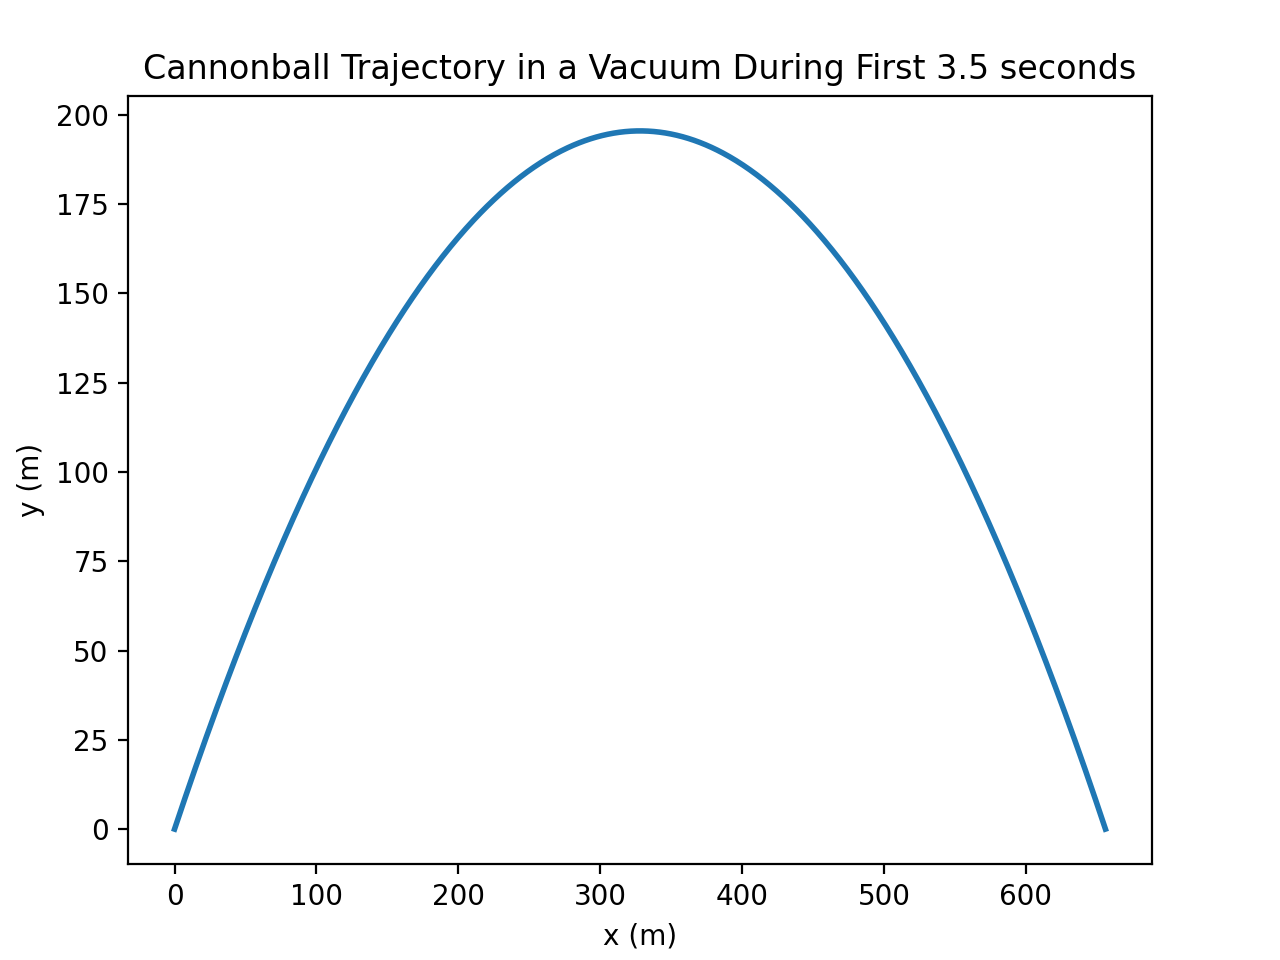

In [4]:
cball_vac_fig = plt.figure()
cball_vac_ax = cball_vac_fig.add_axes([0.1,0.1,0.8,0.8])
cball_vac_ax.set_title('Cannonball Trajectory in a Vacuum During First 3.5 seconds')
cball_vac_ax.set_xlabel('x (m)')
cball_vac_ax.set_ylabel('y (m)')
cball_vac_ax.plot(cball_vac_sol_x, cball_vac_sol_y, lw=2);

In [5]:
cball_vac_sol_x[-1]

656.1469014159997

The ball's horizontal range at $t = 3.5$ s is approximately 656.1 meters.

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

<IPython.core.display.Javascript object>


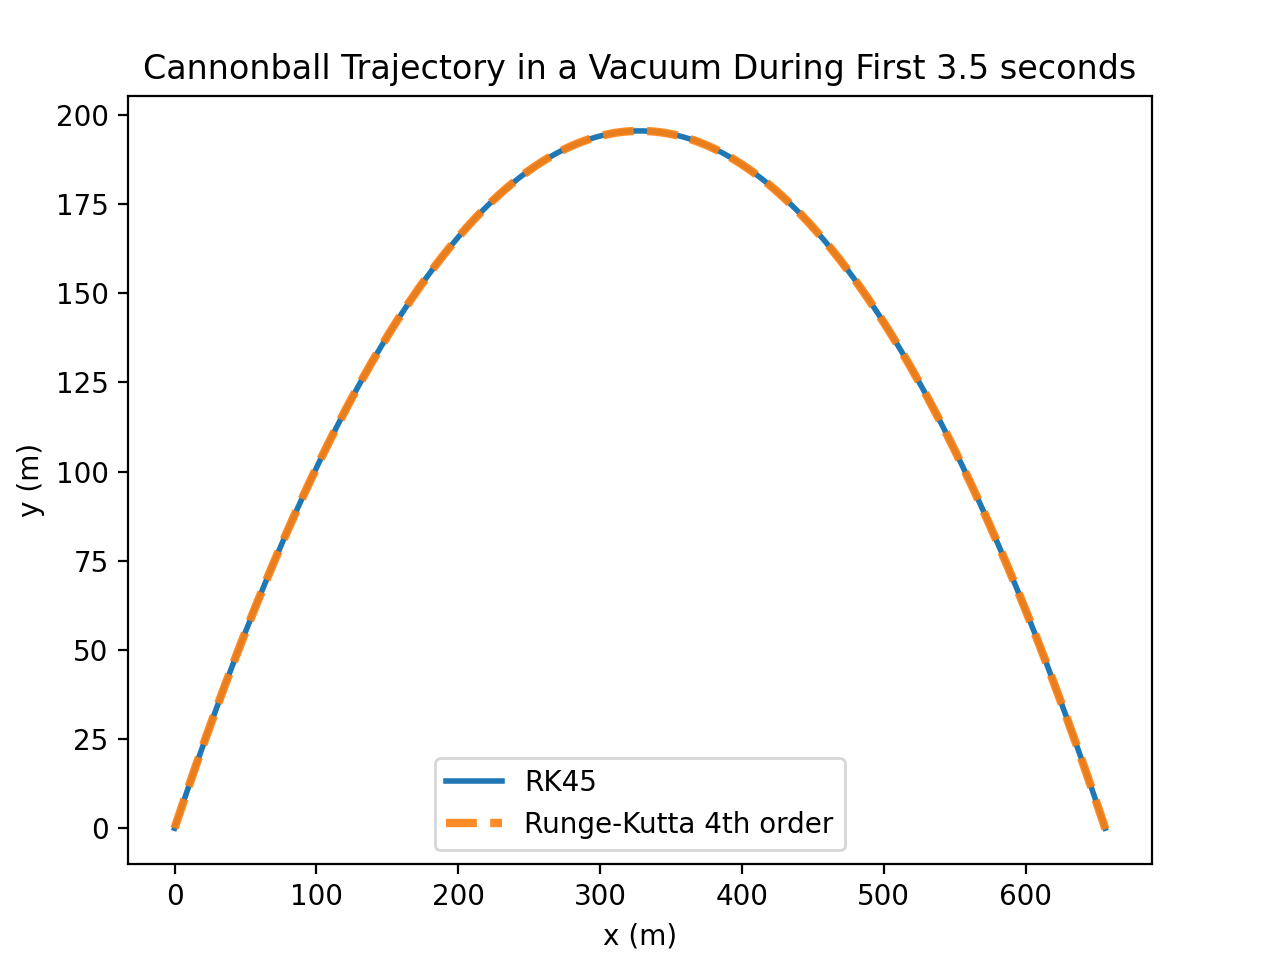

In [6]:
def rungekutta_4(f, t, x0, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(0, n - 1):
        dt = t[i + 1] - t[i]
        k1 = f(t[i], x[i], *args)
        k2 = f(t[i] + (dt / 2), x[i] + (dt / 2) * k1, *args)
        k3 = f(t[i] + (dt / 2), x[i] + (dt / 2) * k2, *args)
        k4 = f(t[i] + dt, x[i] + (dt * k3), *args)
        x[i + 1] = x[i] + (dt / 6) * (k1 + (2 * k2) + (2 * k3) + k4)
    return x

cball_vac_rk4_sol = rungekutta_4(proj_vac, cball_t, cball_init_vals)
cball_vac_rk4_sol_x = cball_vac_rk4_sol[:, 0]
cball_vac_rk4_sol_y = cball_vac_rk4_sol[:, 1]
cball_vac_rk4_fig = plt.figure()
cball_vac_rk4_ax = cball_vac_rk4_fig.add_axes([0.1,0.1,0.8,0.8])
cball_vac_rk4_ax.set_title('Cannonball Trajectory in a Vacuum During First 3.5 seconds')
cball_vac_rk4_ax.set_xlabel('x (m)')
cball_vac_rk4_ax.set_ylabel('y (m)')
cball_vac_rk4_ax.plot(cball_vac_sol_x, cball_vac_sol_y, label='RK45', lw=2)
cball_vac_rk4_ax.plot(cball_vac_rk4_sol_x, cball_vac_rk4_sol_y, '--', label='Runge-Kutta 4th order', lw=3, alpha=0.9)
cball_vac_rk4_ax.legend();

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

My Runge-Kutta 4th order evaluation matches closely with Scipy's RK45 method.

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$\frac{dx}{dt} = v_x$

$\frac{dy}{dt} = v_y$

$\frac{dv_x}{dt} = -{f_{\text{drag}}}_x$

$\frac{dv_y}{dt} = -mg - {f_{\text{drag}}}_y$

Code the equations into a function

In [7]:
# Projectile motion in with constant air pressure
def proj_air(t, init_vals):
    x, y, vx, vy = init_vals
    dx_dt = vx
    dy_dt = vy
    dvx_dt = -f_drag_const(dx_dt)
    dvy_dt = -cball_mass * g - f_drag_const(dy_dt)
    if y < 0:
        return np.zeros(4)
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [8]:
cball_air_sol = integrate.solve_ivp(proj_air,(cball_t0,cball_tf),cball_init_vals,method='RK45',t_eval=cball_t)
cball_air_sol_x = cball_air_sol.y[0]
cball_air_sol_y = cball_air_sol.y[1]

Plot the ball's trajecory and find it's horizontal range

<IPython.core.display.Javascript object>


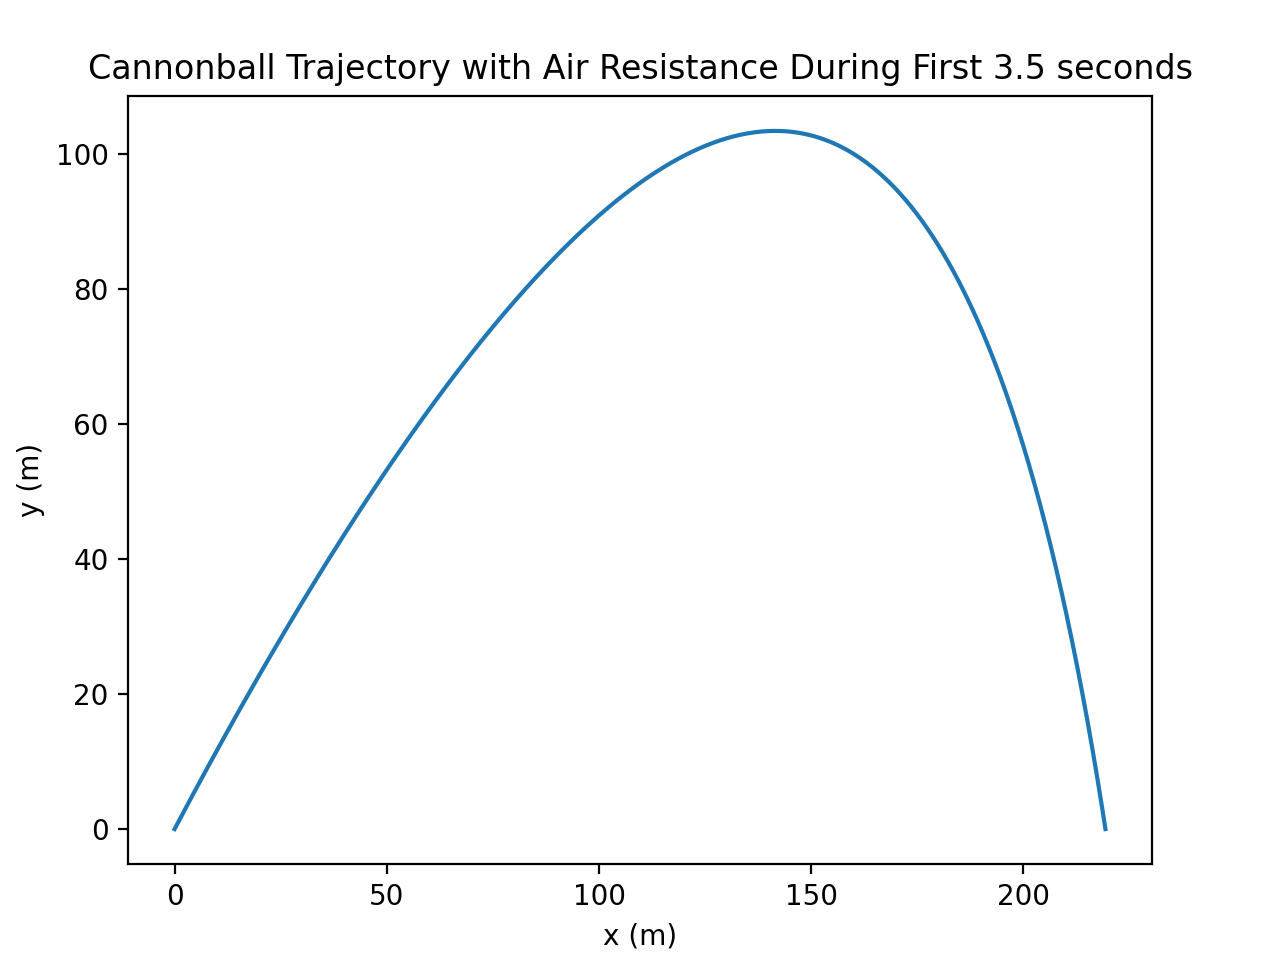

In [9]:
cball_air_fig = plt.figure()
cball_air_ax = cball_air_fig.add_axes([0.1,0.1,0.8,0.8])
cball_air_ax.set_title('Cannonball Trajectory with Air Resistance During First 3.5 seconds')
cball_air_ax.set_xlabel('x (m)')
cball_air_ax.set_ylabel('y (m)')
cball_air_ax.plot(cball_air_sol_x, cball_air_sol_y);

In [10]:
cball_air_sol_x[-1]

219.34050179040722

The ball's horizontal range at $t = 3.5$ s is approximately 219.3 meters.

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex)

$\frac{dx}{dt} = v_x$

$\frac{dy}{dt} = v_y$

$\frac{dv_x}{dt} = -{f_{\text{drag}}}_x$

$\frac{dv_y}{dt} = -mg - {f_{\text{drag}}}_y$

Code the equations into a function

In [11]:
cball_lambda = 10000

# Projectile motion in with atmospheric variation
def proj_airvar(t, init_vals):
    x, y, vx, vy = init_vals
    dx_dt = vx
    dy_dt = vy
    dvx_dt = -f_drag(x, vx)
    dvy_dt = -cball_mass * g - f_drag(y, vy)
    if y < 0:
        return np.zeros(4)
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt])

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 3.5\;s$

In [12]:
cball_airvar_sol = integrate.solve_ivp(proj_airvar,(cball_t0,cball_tf),cball_init_vals,method='RK45',t_eval=cball_t)
cball_airvar_sol_x = cball_airvar_sol.y[0]
cball_airvar_sol_y = cball_airvar_sol.y[1]

Plot the ball's trajectory and find it's horizontal range

<IPython.core.display.Javascript object>


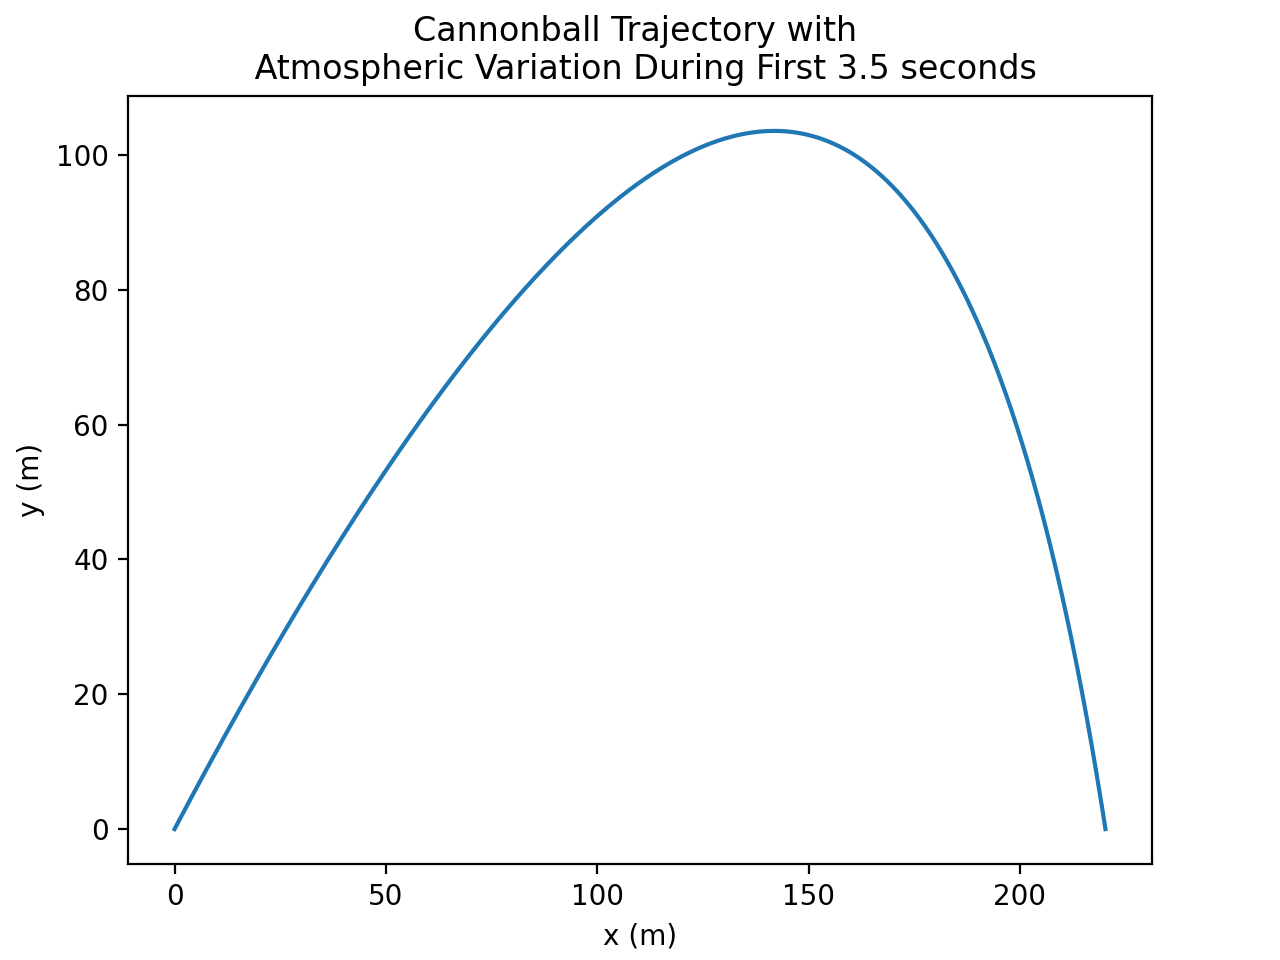

In [13]:
cball_airvar_fig = plt.figure()
cball_airvar_ax = cball_airvar_fig.add_axes([0.1,0.1,0.8,0.8])
cball_airvar_ax.set_title('Cannonball Trajectory with \n Atmospheric Variation During First 3.5 seconds')
cball_airvar_ax.set_xlabel('x (m)')
cball_airvar_ax.set_ylabel('y (m)')
cball_airvar_ax.plot(cball_airvar_sol_x, cball_airvar_sol_y);

In [14]:
cball_airvar_sol_x[-1]

220.2456440641294

The ball's horizontal range at $t = 3.5$ s is approximately 220.2 meters.

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


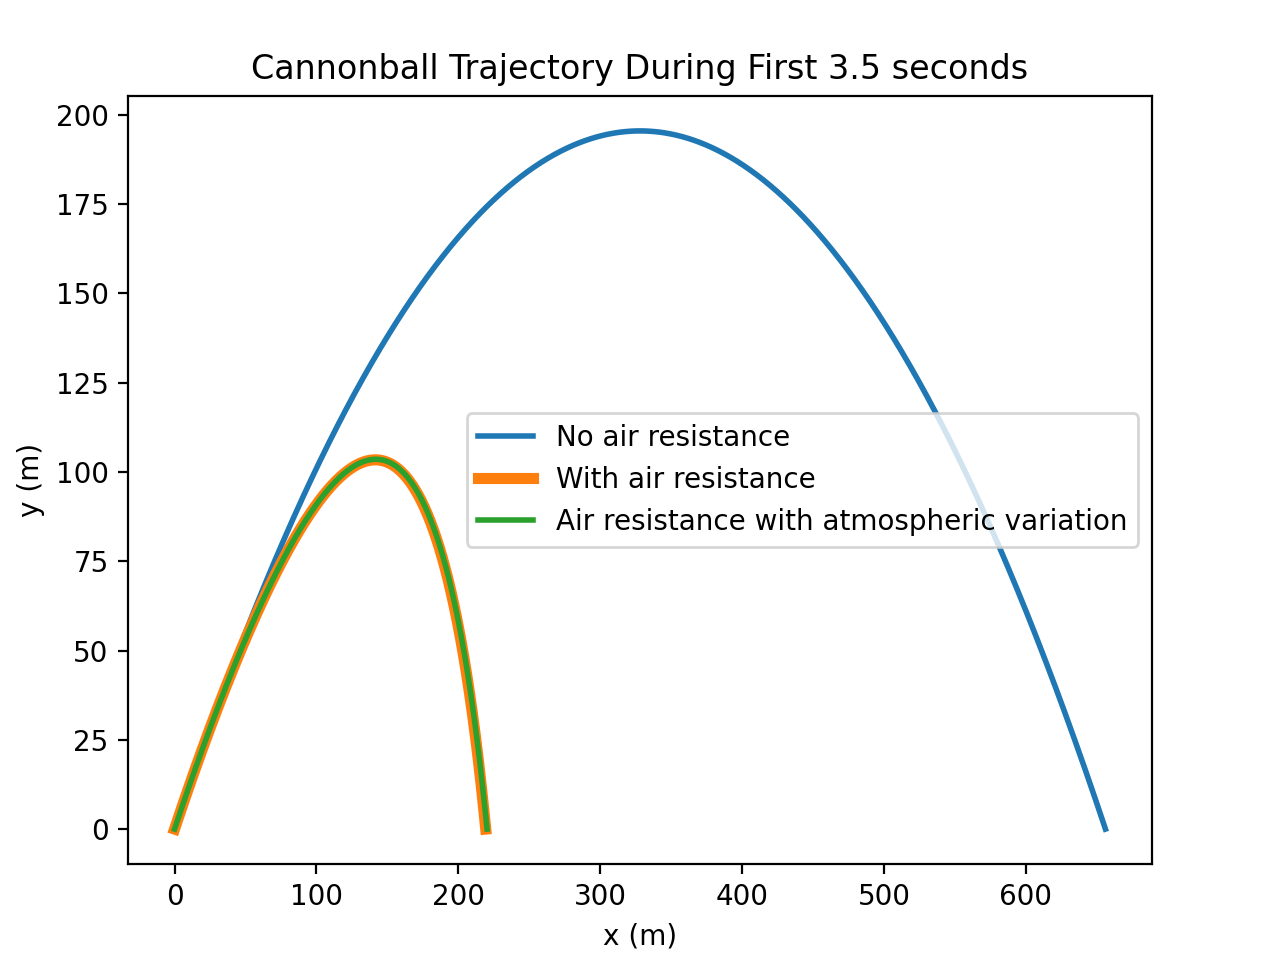

In [15]:
cball_fig = plt.figure()
cball_ax = cball_fig.add_axes([0.1,0.1,0.8,0.8])
cball_ax.set_title('Cannonball Trajectory During First 3.5 seconds')
cball_ax.set_xlabel('x (m)')
cball_ax.set_ylabel('y (m)')
cball_ax.plot(cball_vac_sol_x, cball_vac_sol_y, label='No air resistance', lw=2)
cball_ax.plot(cball_air_sol_x, cball_air_sol_y, label='With air resistance', lw=4)
cball_ax.plot(cball_airvar_sol_x, cball_airvar_sol_y, label='Air resistance with atmospheric variation', lw=2)
cball_ax.legend();

Which impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$)

Turning on air resistance clearly impacts the motion more, as shown in the plot.
The plots for air resistance and for air resistance with atmospheric variation are nearly identical, whereas the plot without air resistance is significantly different.